<a href="https://colab.research.google.com/github/cjguajardo/diplomado-bads/blob/main/EmployeePerformanceAndProductivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files, drive
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar directamente desde GDrive usando la librería de colab.
# drive.mount('/content/drive/')
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Extended_Employee_Performance_and_Productivity_Data.csv', sep=',')


In [4]:
# Cargar CSV por URL alojada en drive
df = pd.read_csv("https://drive.usercontent.google.com/u/0/uc?id=1d9RCsdHl1xCEFK8edUR0hC2ZA_kxSdLH&export=download", sep=',')
df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28,False
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48,True
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60,False
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10,False


In [7]:
# Visualizar información de columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Department                   100000 non-null  object 
 1   Gender                       100000 non-null  object 
 2   Age                          100000 non-null  int64  
 3   Job_Title                    100000 non-null  object 
 4   Years_At_Company             100000 non-null  int64  
 5   Education_Level              100000 non-null  object 
 6   Performance_Score            100000 non-null  int64  
 7   Monthly_Salary               100000 non-null  float64
 8   Work_Hours_Per_Week          100000 non-null  int64  
 9   Projects_Handled             100000 non-null  int64  
 10  Overtime_Hours               100000 non-null  int64  
 11  Sick_Days                    100000 non-null  int64  
 12  Remote_Work_Frequency        100000 non-null  int64  
 13  

In [5]:
# Quitar columnas sin valor para el análisis
df = df.drop(['Employee_ID', 'Hire_Date'], axis=1)
df

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,IT,Male,55,Specialist,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,Finance,Male,29,Developer,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,Finance,Male,55,Specialist,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,Customer Support,Female,48,Analyst,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,Engineering,Female,36,Analyst,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Finance,Male,27,Technician,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28,False
99996,IT,Female,36,Consultant,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48,True
99997,Operations,Male,53,Analyst,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60,False
99998,HR,Female,22,Consultant,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10,False


In [8]:
# Ver si hay valores nulos
df.isna().any().any()

False

In [9]:
df2 = df[df['Resigned']==1]
df2 = df2.drop(['Education_Level','Job_Title','Gender','Department','Resigned'], axis=1)

df2 = df2.corr(method="spearman").round(1)
df2

,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
Age,1.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
Years_At_Company,-0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
Performance_Score,-0.0,0.0,1.0,0.5,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0
Monthly_Salary,-0.0,-0.0,0.5,1.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
Work_Hours_Per_Week,-0.0,0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
Projects_Handled,0.0,-0.0,0.0,0.0,0.0,1.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0
Overtime_Hours,-0.0,-0.0,0.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,0.0,0.0,-0.0,0.0
Sick_Days,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0
Remote_Work_Frequency,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,1.0,-0.0,0.0,0.0,0.0
Team_Size,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,1.0,-0.0,0.0,0.0


<Axes: >

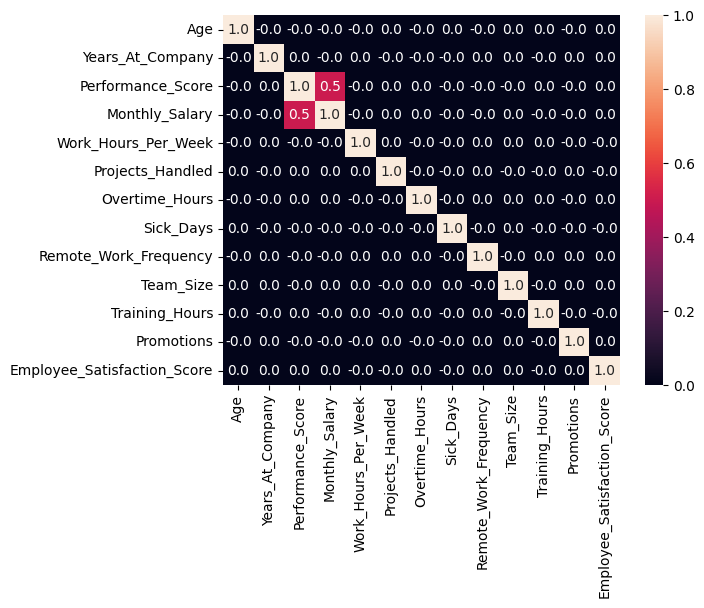

In [10]:
sns.heatmap(df2, annot=True, fmt=".1f")

<Axes: xlabel='Monthly_Salary', ylabel='Performance_Score'>

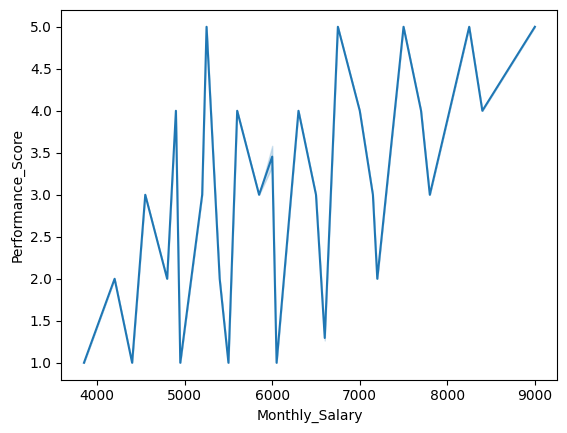

In [11]:
df2 = df[df['Resigned']==1].sort_values(by='Monthly_Salary', ascending=False)
# sns.barplot(x=df2['Monthly_Salary'], y=df2['Performance_Score'])
sns.lineplot(x=df2['Monthly_Salary'], y=df2['Performance_Score'])
